In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def image_to_fourier(image):
    f = np.fft.fft2(image) # 이미지에 푸리에 변환 적용
    fshift = np.fft.fftshift(f) #분석을 용이하게 하기 위해 주파수가 0인 부분을 중앙에 위치시킴. 중앙에 저주파가 모이게 됨.
    magnitude_spectrum = np.log(np.abs(fshift)) #spectrum 구하는 수학식.
    return fshift, magnitude_spectrum

def fourier_to_image(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_new = np.uint8(img_back)
    return img_new

def remove_fourier(fshift, d, option="in"):
    rows, cols = fshift.shape
    if option == "in":
        crow, ccol = rows//2, cols//2 # 이미지의 중앙 좌표
        fshift[crow-d:crow+d, ccol-d:ccol+d] = 0
    elif option == "out":
        fshift[0:d, :] = 0
        fshift[rows-d:rows, :] = 0
        fshift[:, 0:d] = 0
        fshift[:, cols-d:cols] = 0
    return fshift
    

(Text(0.5, 1.0, 'Generated Spectrum'), ([], []), ([], []))

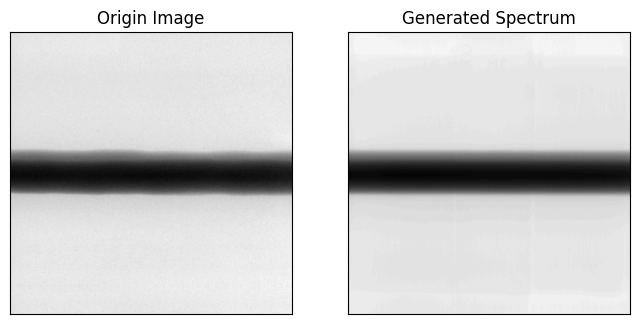

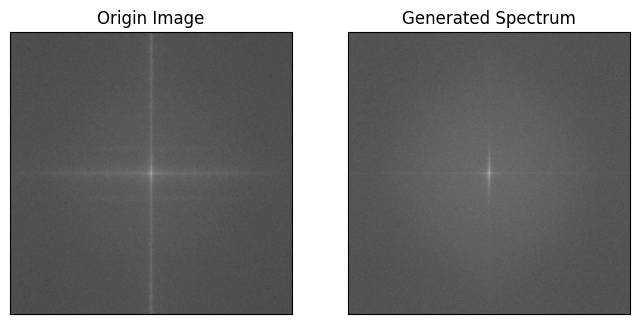

In [6]:
generated_image = cv2.imread("/home/VirtualFlaw/Hyun/IMAGE/ALL/7.92/22E036-04-002/22E036-04-002_with_endcap_centering.jpg", cv2.IMREAD_GRAYSCALE)
origin_image = cv2.imread("/home/VirtualFlaw/Hyun/IMAGE/ALL/7.92/22E036-04-002/centering/22E036-04-002-1st-1-(1)-6.jpg", cv2.IMREAD_GRAYSCALE)

generated_image = cv2.normalize(generated_image, None, 0, 255, cv2.NORM_MINMAX)
origin_image = cv2.normalize(origin_image, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(origin_image, cmap = 'gray')
plt.title('Origin Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(generated_image, cmap = 'gray')
plt.title('Generated Spectrum'), plt.xticks([]), plt.yticks([])

origin_fshift, origin_magnitude_spectrum = image_to_fourier(generated_image)
generated_fshift, generated_magnitude_spectrum = image_to_fourier(origin_image)

generated_fshift = np.subtract(generated_fshift, origin_fshift) #결함에 대한 주파수 영역만 남음.
generated_image = fourier_to_image(generated_fshift)

"""dif_image = cv2.imread("/home/VirtualFlaw/Data/refactoring/data/VirtualFlaw3/Generated/22E022-51-001-1st-1-(2)-21.jpg", cv2.IMREAD_GRAYSCALE)
dif_fshift, dif_magnitude_spectrum = image_to_fourier(dif_image)

dif_fshift = np.subtract(dif_fshift, generated_fshift)
dif_image = fourier_to_image(dif_fshift)

"""

plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(origin_magnitude_spectrum, cmap = 'gray')
plt.title('Origin Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(generated_magnitude_spectrum, cmap = 'gray')
plt.title('Generated Spectrum'), plt.xticks([]), plt.yticks([])


